# Review
  1. You are writing a Monte Carlo algorithm, and you know that it has a 95% chance of running correctly. Your friend has the answer key and will let you know when your algorithm runs correctly. What is the probability that your algorithm will give you a correct answer after:  
    a. Running it once?

    b. Running it 5 times?

    c. Running it 200 times?
    

In [2]:
def monte(n):
    return 1 - 0.05**5

monte(5)

0.9999996875

  2. Let X = outcome of generating a random number from 1-100 (flat distribution).  
    a. What is the sample space?

    b. What is the probability of getting a number within the range [20, 75)?

    c. Write a function `P_d100(x)` for the probability distribution of X.
    

  3. Let X = outcome of rolling a 20-sided die twice.   
        a. What is the sample space? Use a list of tuples.  
        *Hint: Use list generation to make the list of tuples.*

        b. Write a function `P_d20_2(x)` for the probability distribution of X.

        c. Write a function `P_sum(m)` that returns the probability of the two dice adding up to `n`. Use (3b) as a helper function.
        

In [3]:
ss = [(i,j) for i in range(1,21) for j in range(1,21)]
def P_sum(n):
    return len([1 for i in range(1,21) for j in range(1,21) if i+j==n])/len(ss)

P_sum(30)

0.0275

  4. How can we use a histogram to appoximate probability distributions for continuous variables?
  

  5. The code below describes the probability distribution `P_5` for some random variable X.  
    a. What is the sample space?

    b. What is P_5(130)?

    c. What is the expected value of this random variable? Write code to find the answer.
    

In [4]:
import numpy as np

X = np.arange(250) + 50
Y = (X-175)**2 + 100 # Hint: try graphing this parabola!
Y = Y / np.sum(Y)

def P_5(x):
  if 50 <= x and x <= 250:
    return Y[x-50]
  else:
    return 0

In [5]:
E = 0
for x in range(50,251):
    E += x * P_5(x)
E

67.46067627390036

6. What is the difference between a sample frame and a sample space?


# Why random variables?
So far the calculations we've been doing have all depended on a *known theoretical probability*. However, most of the time we actually don't know what the real probability is -- if we did, there would be no point in doing statistics! How can random variables help us to analyze a dataset?

## Penguins Are Back
Let's suppose that our `penguins` dataset contains every single penguin on Earth. We are alien researchers from the planet of Pengalien who are interested in the average penguin bill length.

  7. Fortunately for people on Earth, penguin researchers already have the data for all the penguins. What is the average bill length of all penguins on Earth?

In [6]:
#!pip3 install palmerpenguins
from palmerpenguins import load_penguins
import pandas as pd

penguins = load_penguins()
actual_bill = penguins["bill_length_mm"].mean()
actual_bill

43.9219298245614

  8. Unfortunately for Pengaliens, they don't have this data. All they can do is randomly beam up 5 penguins at a time.  
    a. Write code to get a *sample* of 5 penguins.  
    b. What is the average bill length of this sample?

    c. How close did the Pengaliens get to the actual average bill length?
    

In [7]:
actual_bill - penguins.sample(5)['bill_length_mm'].mean()

-3.018070175438595

  9. Fortunately for Pengaliens, their top engineers are upgrading their tractor beam to take more penguins at a time. In fact, they can take *n* penguins at a time.  
    a. Write a function `sample_mean(n)` that takes a sample of n penguins and returns the mean bill length of that sample.
    
    b. Write a function `sample_means(N, n)` that returns a list containing the result of running `sample_mean(n)` N times.
    


In [8]:
def sample_mean(n):
    return penguins.sample(n)['bill_length_mm'].mean()

def sample_means(N, n):
    return [sample_mean(n) for i in range(N)]

sample_means(10,10)

[42.849999999999994,
 44.84,
 42.53333333333333,
 46.11,
 45.81,
 43.84,
 43.85000000000001,
 41.17999999999999,
 45.260000000000005,
 42.46000000000001]

## Sampling Distribution of Sample Means

  10. Using your code from (9): Use `seaborn` or `altair` to generate a histogram for `sample_means(10,5)`. This histogram is the **sampling distribution** of the *sample mean*; here, we're looking at N=10 samples of n=5 penguins each.  

    *Hint: Change the values of N and n to answer the following questions. Use `.describe()`!*  
    a. What happens to the sampling distribution as we increase N?

    b. What happens to the sampling distribution as we increase n?


                0
count  100.000000
mean    43.483550
std      2.466155
min     37.620000
25%     41.743750
50%     43.810000
75%     45.120000
max     50.860000


<AxesSubplot:ylabel='Count'>

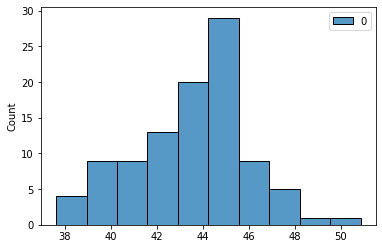

In [24]:
import seaborn as sns
means = pd.DataFrame(sample_means(100,5))
print(means.describe())
sns.histplot(data=means)

  11. Let X be a *random variable* = bill length of a randomly selected penguin.  
    a. Using your answer to (10) as reference, what is the expected value of X?  
      *Hint: The sampling distribution can be interpreted as a probability distribution!*
  
    b. How far off is (11a) from (7)?

    c. Does your answer to (11b) change if we increase N or n?

  12. Explain how we can use random variables to get an estimate of actual attributes of a population.
  

## Sampling Distribution of Sample Proportions
We can look at other attributes other than arithmetic mean. Something else we can look at is proportion; for example, what % of all penguins are Gentoo?

  13. The Pengaliens are back at it again, but this time they want to examine Gentoo penguins. The human researchers still have all the data, and the Pengaliens are continuing to use their improved tractor beam.  
    a. What is the actual % of Gentoo penguins on Earth?

    b. Write a function `sample_proportion(n)` that returns the % of Gentoo penguins from a sample of n penguins.

    c. Write a function `sample_proportions(N,n)` that returns a list of the results of running `sample_proportion(n)` N times

In [10]:
#a
a13 = penguins['species'].value_counts()['Gentoo']/penguins.shape[0]
print(a13)

#b
def sample_proportion(n):
    return penguins.sample(n)['species'].value_counts().get('Gentoo', default=0)/n

def sample_proportions(N, n):
    return [sample_proportion(n) for i in range(N)]

0.36046511627906974


  14. Similar to the sampling distribution of sample means, let X = the % of Gentoo penguins in our sample.  
  Create a histogram to help you describe the *center* of the **sampling distributions** of *sample proportions*. How far is it from the actual percentage that you calculated in (13a)?

                 0
count  5000.000000
mean      0.360784
std       0.063148
min       0.140000
25%       0.320000
50%       0.360000
75%       0.400000
max       0.580000


<AxesSubplot:ylabel='Count'>

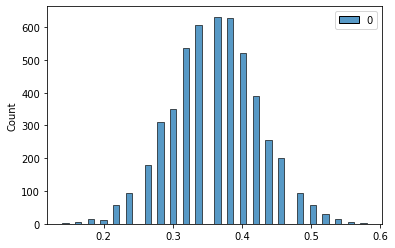

In [20]:
props = pd.DataFrame(sample_proportions(5000,50))
print(props.describe())
sns.histplot(data=props)

# Central Limit Theorem
As you may have noticed, the more samples you take, the more symmetrical and non-skewed the histograms become. The **Central Limit Theorem** states that as you increase the sample size, the sampling distribution of those samples approaches a *normal* distribution. From this, we can infer that the expected value of the mean of the sampling distribution will appoach the population parameter that we are looking for.

If this sounds like a lot, don't worry!! It will be explained in class.

# Practice
15. An entomologist is researching cicadas, and since billions of Brood X cicadas are coming this year, they have the perfect chance to get samples. Their first study consists of 100 samples of 10 cicadas each; the sampling distribution of the sample mean of cicada wingspan has a mean of 18cm and a standard deviation of 1cm.

    a. Interpret these statistics. Would you be surprised to find a cicada with a wingspan of 18.5cm? What about 21cm?

    b. What would happen to the standard deviation if 1000 samples were taken instead of 100?


  16. A linguist conducts a survey at school to see how many students can speak more than one language. After a sample of 200 students, the linguist arrives at a sample proportion of 25%. How might information (such as the mean or standard deviation) about the sampling distribution of the sample proportion help the linguist determine the accuracy of the survey?


17. A candy enthusiast has a particular dislike of sour candies. As a gift, their friend buys them a big assortment of candy, but 5% of the candy within this bag is sour. Describe what the sampling distribution of the sample proportion would look like after taking 1000 samples (center, variability, skew).